# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.650  1  0.983 0.323 0.005   
                             age        0.207  1  0.313 0.577 0.002   
                             Kiel       2.776  1  4.199 0.042 0.022   
                             Magdeburg  5.386  1  8.145 0.005 0.041   
                             Sweden     8.874  1 13.421 0.000 0.066   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.000  1  0.000 0.995 0.000   
                             age        0.422  1  0.457 0.500 0.002   
                             Kiel       0.086  1  0.094 0.760 0.000   
                             Magdeburg  1.623  1  1.759 0.186 0.009   
                             Sweden    18.556  1 20.112 0.000 0.095   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.491  0.489    False  
                             age               0.239  0.712    False  
                             Kiel              1.379  0.105    False  
                             Magdeburg         2.319  0.018     True  
                             Sweden            3.492  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.002  0.997    False  
                             age               0.301  0.648    False  
                             Kiel              0.119  0.850    False  
                             Magdeburg         0.730  0.332    False  
                             Sweden            4.900  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.050  1  7.663 0.006 0.039   
                             age        0.006  1  0.042 0.838 0.000   
                             Kiel       0.280  1  2.045 0.154 0.011   
                             Magdeburg  0.500  1  3.651 0.058 0.019   
                             Sweden     1.761  1 12.855 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.588  1  4.527 0.035 0.023   
                             age        0.377  1  0.660 0.418 0.003   
                             Kiel       2.967  1  5.191 0.024 0.026   
                             Magdeburg  2.799  1  4.898 0.028 0.025   
                             Sweden    21.645  1 37.869 0.000 0.165   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.208  0.018     True  
                             age               0.077  0.891    False  
                             Kiel              0.811  0.256    False  
                             Magdeburg         1.240  0.115    False  
                             Sweden            3.369  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.460  0.076    False  
                             age               0.379  0.547    False  
                             Kiel              1.623  0.056    False  
                             Magdeburg         1.552  0.064    False  
                             Sweden            8.361  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.208  0.018     True   
                             Kiel      0.154         0.811  0.256    False   
                             Magdeburg 0.058         1.240  0.115    False   
                             Sweden    0.000         3.369  0.002     True   
                             age       0.838         0.077  0.891    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.035         1.460  0.076    False   
                             Kiel      0.024         1.623  0.056    False   
                             Magdeburg 0.028         1.552  0.064    False   
                             Sweden    0.000         8.361  0.000     True   
                             age       0.418         0.379  0.547    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.323         0.491  0.489    False  
                             Kiel      0.042         1.379  0.105    False  
                             Magdeburg 0.005         2.319  0.018     True  
                             Sweden    0.000         3.492  0.002     True  
                             age       0.577         0.239  0.712    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.995         0.002  0.997    False  
                             Kiel      0.760         0.119  0.850    False  
                             Magdeburg 0.186         0.730  0.332    False  
                             Sweden    0.000         4.900  0.000     True  
                             age       0.500         0.301  0.648    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.224         3.352     0.277     0.261         2.477     0.338
std       0.292         6.409     0.319     0.303         5.314     0.330
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.411     0.002     0.004         0.335     0.015
50%       0.057         1.243     0.114     0.120         0.919     0.241
75%       0.388         3.364     0.518     0.463         2.428     0.617
max       1.000        86.893     1.000     0.999       144.416     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_51105/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.208   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.469   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.225         0.648   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.248         0.605   
A0A075B6H7                                         AD     0.024         1.614   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.298         0.525   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.831         0.080   
S4R3U6                                             AD     0.035         1.460   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.018     True   
A0A024R0T9;K7ER74;P02655                           AD      0.075    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.344    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.372    False   
A0A075B6H7                                         AD      0.057    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.429    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.156    False   
Q9Y6Y9                                             AD      0.887    False   
S4R3U6                                             AD      0.076    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.323         0.491   
A0A024R0T9;K7ER74;P02655                           AD     0.054         1.271   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.089         1.050   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.600         0.222   
A0A075B6H7                                         AD     0.340         0.468   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.047         1.329   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.156         0.807   
S4R3U6                                             AD     0.995         0.002   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.489    False  
A0A024R0T9;K7ER74;P02655                           AD      0.128    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.191    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.730    False  
A0A075B6H7                                         AD      0.507    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.243         1.594     0.303     0.254         1.411     0.337
std       0.293         1.896     0.317     0.290         1.633     0.316
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.007         0.360     0.019     0.012         0.359     0.038
50%       0.089         1.049     0.165     0.123         0.911     0.244
75%       0.437         2.166     0.566     0.438         1.935     0.596
max       0.999        26.167     0.999     0.999        21.379     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,942,1036


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.208  0.018   
A0A024R0T9;K7ER74;P02655                           0.034         1.469  0.075   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.225         0.648  0.344   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.248         0.605  0.372   
A0A075B6H7                                         0.024         1.614  0.057   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.298         0.525  0.429   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.156   
Q9Y6Y9                                             0.831         0.080  0.887   
S4R3U6                                             0.035         1.460  0.076   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.323   
A0A024R0T9;K7ER74;P02655                              False 0.054   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.089   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.600   
A0A075B6H7                                            False 0.340   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.047   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.156   
S4R3U6                                                False 0.995   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.491  0.489   
A0A024R0T9;K7ER74;P02655                                   1.271  0.128   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.050  0.191   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.222  0.730   
A0A075B6H7                                                 0.468  0.507   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.329  0.115   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.807  0.291   
S4R3U6                                                     0.002  0.997   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    892
DAE (yes) - PI (yes)   335
DAE (yes) - PI (no)    144
DAE (no)  - PI (yes)    50
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_51105/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


DAE                       \
                                                 p-unc -Log10 pvalue qvalue   
protein groups                                                                
A0A024QZX5;A0A087X1N8;P35237                     0.006         2.208  0.018   
A0A075B6R2                                       0.001         3.081  0.003   
A0A075B6S5                                       0.016         1.785  0.041   
A0A075B7B8                                       0.000         4.233  0.000   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2 0.000         5.469  0.000   
...                                                ...           ...    ...   
Q9ULP0-3;Q9ULP0-6                                0.000         3.540  0.001   
Q9UNW1                                           0.780         0.108  0.849   
Q9UP79                                           0.000         4.109  0.000   
Q9UQ52                                           0.001         3.281  0.002   
Q9Y6C2                                           0.001         3.060  0.003   

                                                             PI                \
                                                 rejected p-unc -Log10 pvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                         True 0.323         0.491   
A0A075B6R2                                           True 0.440         0.356   
A0A075B6S5                                           True 0.186         0.730   
A0A075B7B8                                           True 0.512         0.290   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2     True 0.735         0.134   
...                                                   ...   ...           ...   
Q9ULP0-3;Q9ULP0-6                                    True 0.022         1.653   
Q9UNW1                                              False 0.005         2.275   
Q9UP79                                               True 0.271         0.567   
Q9UQ52                                               True 0.054         1.266   
Q9Y6C2                                               True 0.853         0.069   

                                                                      data  
                                                 qvalue rejected frequency  
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237                      0.489    False       186  
A0A075B6R2                                        0.598    False       164  
A0A075B6S5                                        0.332    False       129  
A0A075B7B8                                        0.659    False        57  
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2  0.832    False       134  
...                                                 ...      ...       ...  
Q9ULP0-3;Q9ULP0-6                                 0.065    False       136  
Q9UNW1                                            0.020     True       171  
Q9UP79                                            0.433    False       135  
Q9UQ52                                            0.129    False       188  
Q9Y6C2                                            0.915    False       119  

[194 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.018,0.489,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.075,0.128,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.344,0.191,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.372,0.730,196,DAE (no) - PI (no)
A0A075B6H7,0.057,0.507,91,DAE (no) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.317,197,DAE (no) - PI (no)
Q9Y6X5,0.429,0.115,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.156,0.182,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O94898,0.000,0.962,60,DAE (yes) - PI (no),0.962
P22748,0.033,0.981,159,DAE (yes) - PI (no),0.948
F5GWE5;I3L2X8;I3L3W1;I3L459;I3L471;I3L4C0;I3L4H1;I3L4U7;Q00169,0.009,0.957,78,DAE (yes) - PI (no),0.948
O60565,0.000,0.930,81,DAE (yes) - PI (no),0.930
P22692;P22692-2,0.022,0.943,170,DAE (yes) - PI (no),0.921
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.046,0.057,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.056,197,DAE (yes) - PI (no),0.011
K7ERI9;P02654,0.051,0.041,196,DAE (no) - PI (yes),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


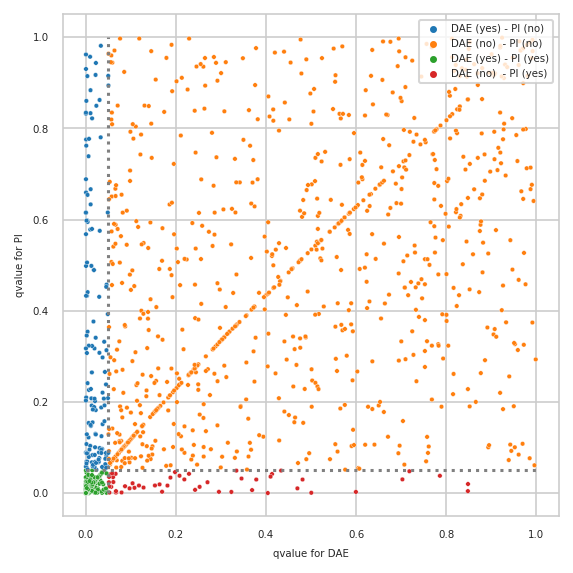

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


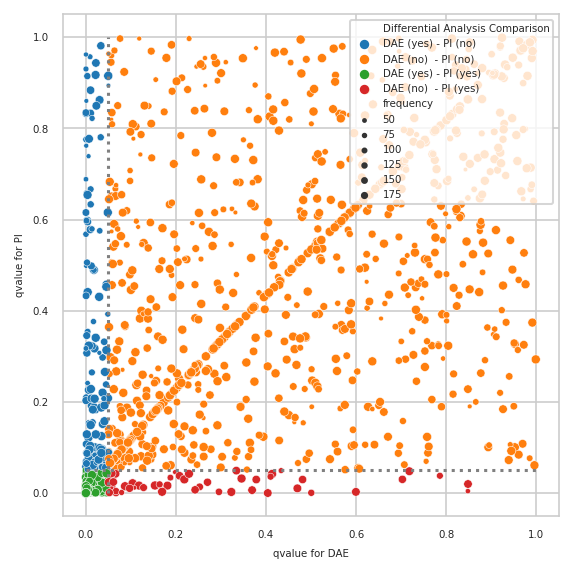

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out